In [62]:
import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-paper")
plt.rcParams["font.family"] = "monospace"

In [63]:
PATH = "/home/sparrow/cv/data/cables"

In [64]:
CABLES = [
    PATH + "/1.png",
    PATH + "/2.png",
    PATH + "/3.png",
    PATH + "/4.png",
    PATH + "/5.png",
    PATH + "/6.png",
    PATH + "/7.png",
    PATH + "/9.png",
    PATH + "/11.png",
    PATH + "/12.png",
    PATH + "/14.png",
    PATH + "/15.png",
    PATH + "/16.png"
]

In [65]:
cables = [cv2.imread(cable) for cable in CABLES]
gray_cables = [cv2.cvtColor(cable, cv2.COLOR_BGR2GRAY) for cable in cables]

## Adaptive Thresholding

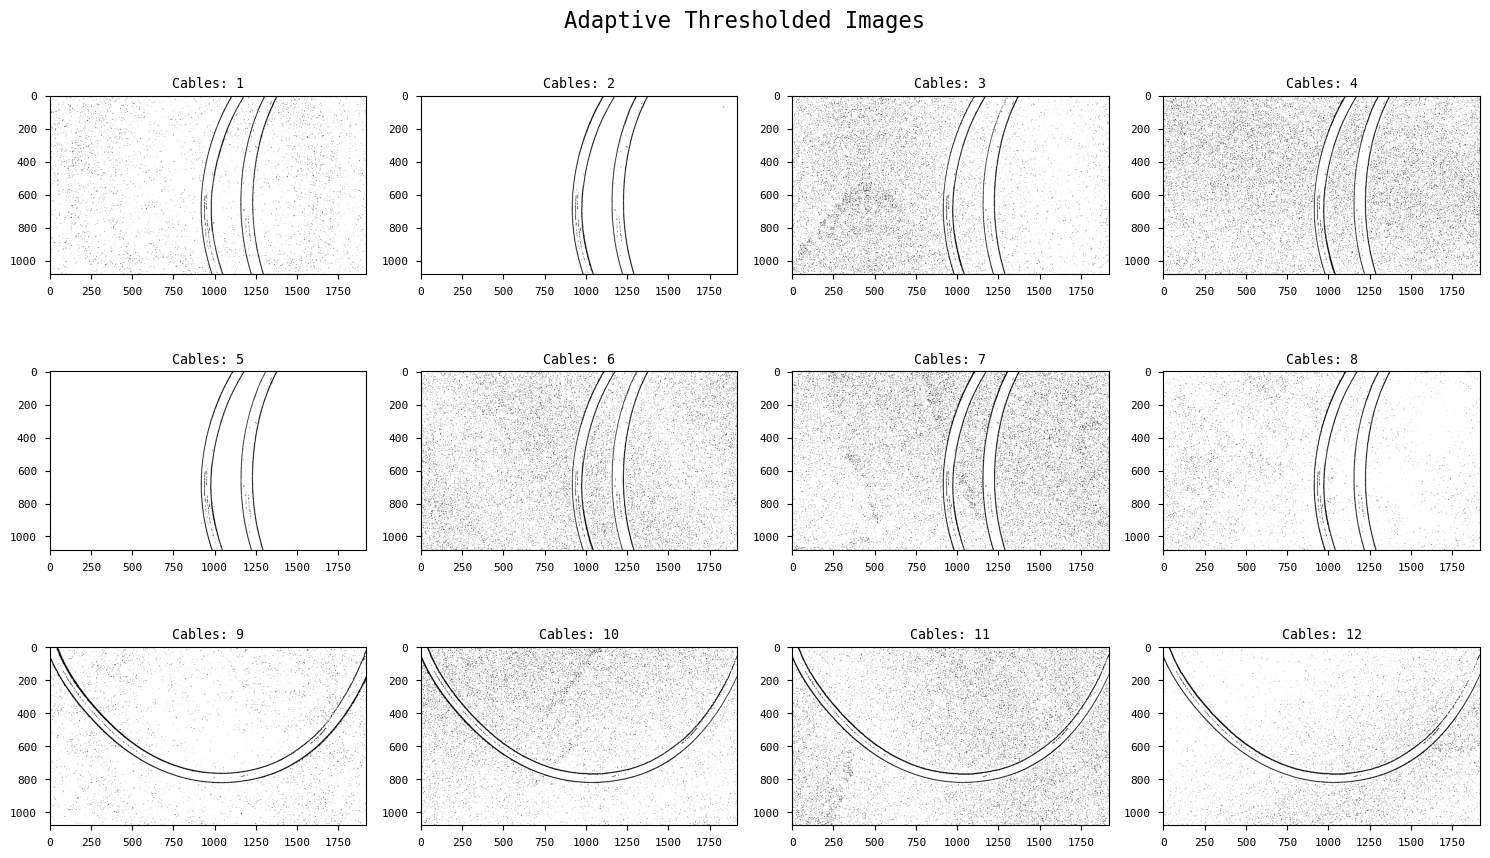

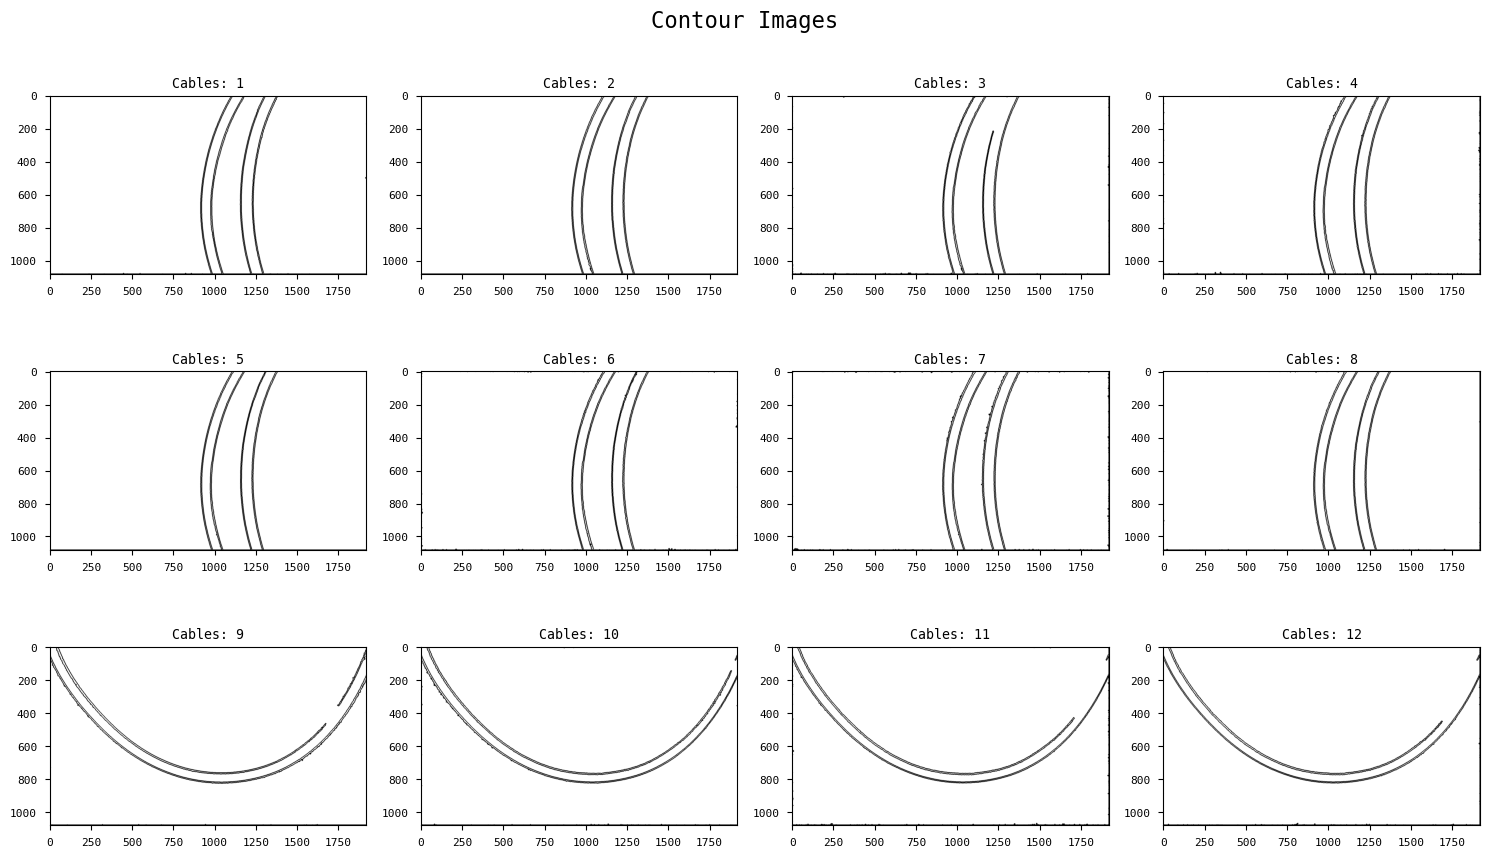

In [80]:
adaptive_thresholded_images = []

for cable in cables:
    img = cv2.cvtColor(cable, cv2.COLOR_RGB2GRAY)
    adaptive_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    adaptive_thresholded_images.append(adaptive_thresh)

# Get rid of the salt-pepper noise
for i in range(12):
    adaptive_thresholded_images[i] = cv2.medianBlur(adaptive_thresholded_images[i], 5)
    
# Extract the contours from the adaptive thresholded images
contours = []
for i in range(12):
    contours.append(cv2.findContours(adaptive_thresholded_images[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0])
    
# Draw the contours
contour_images = []
for i in range(12):
    contour_image = np.zeros_like(adaptive_thresholded_images[i])
    cv2.drawContours(contour_image, contours[i], -1, (255 ,255, 255), 3)
    contour_images.append(contour_image)

# Improve the brightness and contrast of the contour images
for i in range(12):
    contour_images[i] = np.log(contour_images[i] + 2)